# AHP 변수선정
- https://datascream.co.kr/136

- AHP 단계
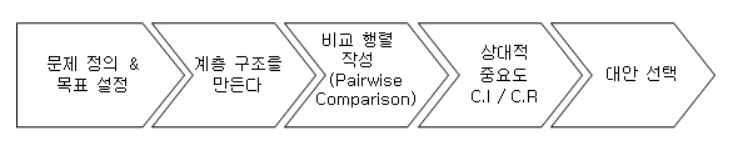
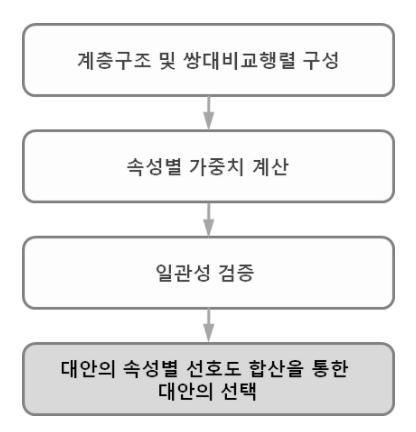

# 계층구조
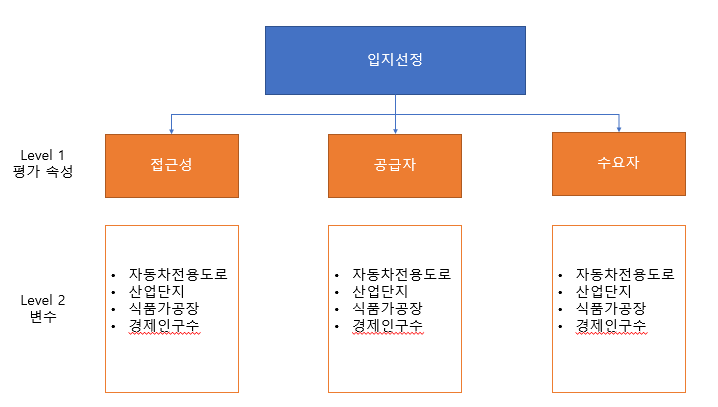

# 속성별 중요도 계산

In [124]:
import numpy as np
import pandas as pd

- 쌍대비교행렬구성

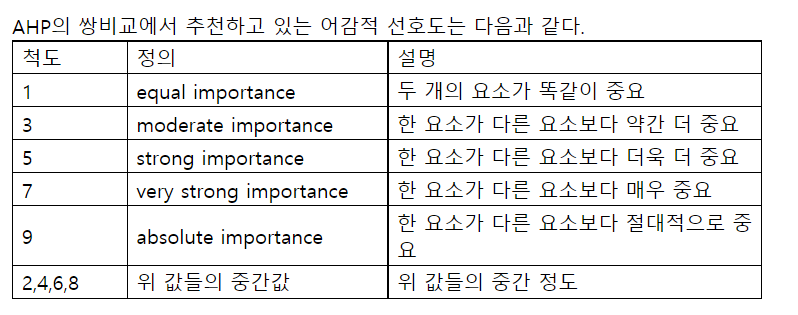

- 위 표를 바탕으로 쌍대비교행렬을 구성하였음

In [83]:
#쌍대비교행렬
#접근성, 공급자, 수요자
factor = [[1,5,3],
          [1/5,1,1/3],
          [1/3,3,1]]
factor=np.array(factor)

In [129]:
factor_df = pd.DataFrame(factor,columns=(['접근성','공급자','수요자']))
factor_df

,접근성,공급자,수요자
0,1.000000,5.0,3.000000
1,0.200000,1.0,0.333333
2,0.333333,3.0,1.000000


- 속성 정규화

In [87]:
def nomal2(X):
    X_nomal = np.zeros((3,3))
    for i in range(3):
        X_nomal[:,i] = X[:,i]/sum(X[:,i])
    
    return(X_nomal)

In [89]:
factor_nomal = nomal2(factor)

In [90]:
factor_nomal

array([[0.65217391, 0.55555556, 0.69230769],
       [0.13043478, 0.11111111, 0.07692308],
       [0.2173913 , 0.33333333, 0.23076923]])

- 속성별 중요도 계산

In [94]:
#속성별 중요도
factor_total = [(sum(factor_nomal[0])/3),(sum(factor_nomal[1])/3),(sum(factor_nomal[2])/3)]
factor_total

[0.633345720302242, 0.1061563235476279, 0.26049795615013005]

In [95]:
factor_total = np.array(factor_total)

In [97]:
factor_total

array([0.63334572, 0.10615632, 0.26049796])

# 최종 속성별 중요도 (가중치)
- 접근성 : 0.63334572
- 공급자 : 0.10615632
- 수요자 : 0.26049796

# 일관성 검증
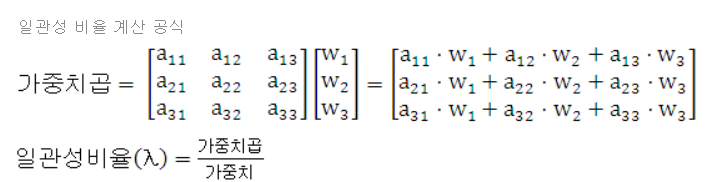

In [104]:
factor

array([[1.        , 5.        , 3.        ],
       [0.2       , 1.        , 0.33333333],
       [0.33333333, 3.        , 1.        ]])

In [105]:
factor_total

array([0.63334572, 0.10615632, 0.26049796])

In [108]:
#가중치곱
factor_multi = factor*factor_total
factor_multi

array([[0.63334572, 0.53078162, 0.78149387],
       [0.12666914, 0.10615632, 0.08683265],
       [0.21111524, 0.31846897, 0.26049796]])

In [110]:
A = [sum(factor_multi[0]),sum(factor_multi[1]),sum(factor_multi[2])]
A

[1.9456212064907716, 0.31965811965811963, 0.7900821668937611]

In [111]:
#일관성 비율 
#가중치곱/가중치 
B = A/factor_total
B

array([3.0719734 , 3.01120187, 3.03296877])

In [112]:
MAX = sum(B)/3
MAX

3.0387146809594667

In [113]:
CI = (MAX-3)/2
CI

0.019357340479733365

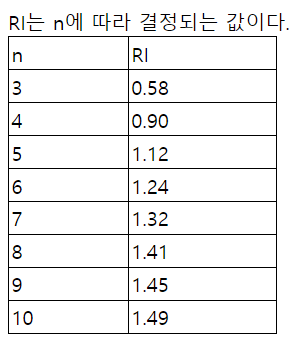
n = 3
따라서 RI = 0.58 이다.

In [114]:
RI = 0.58
CR = CI/RI

CR

0.03337472496505753

# 일관성 검증 결과 해석 

CR의 결과값이 0.0334으로 0.1보다 적으므로 위의 선호도 행렬은 일관성이 높다고 볼 수 있다.

# 개별변수의 각 속성에 대한 적합도 계산

In [2]:
#접근성
access = [[1,1/7,3,5],
       [7,1,5,7],
       [1/3,1/5,1,3],
       [1/5,1/7,1/3,1]]

access = np.array(access)

In [48]:
#수요자
consum = [[1,5,3,7],
          [1/5,1,1/3,3],
          [1/3,3,1,5],
          [1/7,1/3,1/5,1]]
consum = np.array(consum)

In [54]:
#공급자
prod = [[1,1/3,5,3],
        [3,1,7,5],
        [1/5,1/7,1,1/3],
        [1/3,1/5,3,1]]
prod = np.array(prod)

- 정규화

In [50]:
def nomal(X):
    X_nomal = np.zeros((4,4))
    for i in range(4):
        X_nomal[:,i] = X[:,i]/sum(X[:,i])
    
    return(X_nomal)

In [51]:
#접근성 정규화
access_nomal = nomal(access)
access_nomal

array([[0.1171875 , 0.09615385, 0.32142857, 0.3125    ],
       [0.8203125 , 0.67307692, 0.53571429, 0.4375    ],
       [0.0390625 , 0.13461538, 0.10714286, 0.1875    ],
       [0.0234375 , 0.09615385, 0.03571429, 0.0625    ]])

In [52]:
#수요자 정규화
consum_nomal = nomal(consum)
consum_nomal

array([[0.59659091, 0.53571429, 0.66176471, 0.4375    ],
       [0.11931818, 0.10714286, 0.07352941, 0.1875    ],
       [0.19886364, 0.32142857, 0.22058824, 0.3125    ],
       [0.08522727, 0.03571429, 0.04411765, 0.0625    ]])

In [55]:
#공급자 정규화
prod_nomal = nomal(prod)
prod_nomal

array([[0.22058824, 0.19886364, 0.3125    , 0.32142857],
       [0.66176471, 0.59659091, 0.4375    , 0.53571429],
       [0.04411765, 0.08522727, 0.0625    , 0.03571429],
       [0.07352941, 0.11931818, 0.1875    , 0.10714286]])

In [115]:
#개별 변수의 각 속성에 대한 적합도 계산 함수
def AHP(X):
    
    dX_1 = sum(X[0])
    dX_2 = sum(X[1])
    dX_3 = sum(X[2])
    dX_4 = sum(X[3])
    
    dX_sum = dX_1+dX_2+dX_3+dX_4
    
    dX_indus = dX_1/dX_sum
    dX_car = dX_2/dX_sum
    dX_food = dX_3/dX_sum
    dX_people = dX_4/dX_sum
    
    return(dX_indus, dX_car, dX_food, dX_people)

In [116]:
tt = np.zeros((4,3))
tt

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [117]:
tt[:,0] = AHP(access_nomal)

In [118]:
tt[:,1] = AHP(consum_nomal)

In [119]:
tt[:,2] = AHP(prod_nomal)

In [120]:
#각 속성의 개별변수 적합도
tt

array([[0.21181748, 0.55789248, 0.26334511],
       [0.61665093, 0.12187261, 0.55789248],
       [0.11708019, 0.26334511, 0.0568898 ],
       [0.05445141, 0.0568898 , 0.12187261]])

- 속성별 중요도를 가중합산하여 각 변수의 최종점수 산출

In [121]:
#속성별 중요도 * 각 변수의 적합도
dd = np.zeros((4,3))
dd[:,0] = tt[:,0]*factor_total[0]
dd[:,1] = tt[:,1]*factor_total[1]
dd[:,2] = tt[:,2]*factor_total[2]
dd

array([[0.13415369, 0.05922381, 0.06860086],
       [0.39055323, 0.01293755, 0.14532985],
       [0.07415223, 0.02795575, 0.01481968],
       [0.03448657, 0.00603921, 0.03174757]])

In [128]:
#변수별 최종 점수
final = [sum(dd[0]),sum(dd[1]),sum(dd[2]),sum(dd[3])]
final

[0.2619783712776747,
 0.5488206236983565,
 0.11692766014809163,
 0.07227334487587722]

# 결과
- 1위 : 자동차
- 2위 : 산업단지
- 3위 : 식품가공장
- 4위 : 경제인구

# 추출된 점수를 바탕으로 최종입지선정

# 경북

In [201]:
gb = pd.read_csv('./경북_최종_데이터.csv')
gb

,id,x,y,indust,people,car,food,total,rank
0,1,128.635,35.809,0,3,9,0,NaN,NaN
1,2,128.635,35.854,0,4,12,0,NaN,NaN
2,3,128.636,35.899,2,4,12,0,NaN,NaN
3,4,128.636,35.944,1,5,4,0,NaN,NaN
4,5,129.186,35.712,0,1,10,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
898,899,128.631,35.583,0,1,0,0,NaN,NaN
899,900,128.632,35.628,0,1,8,10,NaN,NaN
900,901,128.633,35.673,0,1,0,1,NaN,NaN
901,902,128.633,35.718,0,2,1,0,NaN,NaN


- 정규화

In [203]:
from sklearn.preprocessing import MinMaxScaler
x = gb.loc[:,['indust','people','car','food']]
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(x)
gb.loc[:,['indust','people','car','food']] = scaled_values

In [205]:
final

[0.2619783712776747,
 0.5488206236983565,
 0.11692766014809163,
 0.07227334487587722]

- final[0] = 산업단지
- final[1] = 자동차 차선
- final[2] = 식품가공장
- final[3] = 경제인구

- 최종 점수산출

In [206]:
gb['total'] = (gb['indust']*round(final[0],3))+(gb['people']*round(final[3],3))+(gb['car']*round(final[1],3))+(gb['food']*round(final[2],3))

In [207]:
gb['rank'] = gb.total.rank(ascending=False,method='dense')

# 경북 최종 순위(상위 10개)

In [209]:
gb_final = gb.sort_values('total',ascending=False).head(10)
gb_final

,id,x,y,indust,people,car,food,total,rank
165,166,129.303,36.026,0.142857,0.714286,0.941176,0.0,0.605563,1.0
753,754,128.361,36.126,0.000000,0.571429,1.000000,0.0,0.590143,2.0
149,150,128.751,36.168,1.000000,0.857143,0.441176,0.0,0.565920,3.0
312,313,129.412,35.934,0.285714,1.000000,0.588235,0.0,0.469798,4.0
780,781,128.417,36.126,0.142857,1.000000,0.588235,0.0,0.432370,5.0
151,152,128.752,36.213,0.714286,0.714286,0.294118,0.1,0.411742,6.0
871,872,128.580,35.899,0.142857,0.714286,0.558824,0.0,0.395651,7.0
639,640,128.139,36.128,0.142857,0.571429,0.558824,0.0,0.385366,8.0
311,312,129.411,35.889,0.000000,0.857143,0.588235,0.0,0.384655,9.0
752,753,128.361,36.081,0.142857,0.714286,0.529412,0.0,0.379504,10.0


In [210]:
gb_final.to_csv("./경북최종순위.csv",encoding="cp949", mode='w', index=False)

# 경남

In [216]:
gn = pd.read_csv('./경남_최종_데이터.csv')
gn

,id,x,y,indust,people,car,food,total,rank
0,1,129.182,35.532,0,3,5,1,NaN,NaN
1,2,129.183,35.577,0,7,4,1,NaN,NaN
2,3,129.184,35.622,0,3,2,0,NaN,NaN
3,4,129.185,35.667,2,1,2,1,NaN,NaN
4,5,129.186,35.712,3,1,10,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
649,650,128.629,35.403,1,1,0,0,NaN,NaN
650,651,128.629,35.448,0,1,2,0,NaN,NaN
651,652,128.630,35.493,0,1,0,0,NaN,NaN
652,653,128.631,35.538,0,1,0,0,NaN,NaN


- 정규화 

In [212]:
x = gn.loc[:,['indust','people','car','food']]
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(x)
gn.loc[:,['indust','people','car','food']] = scaled_values
gn

,id,x,y,indust,people,car,food,total,rank
0,1,129.182,35.532,0.000000,0.333333,0.104167,0.2,NaN,NaN
1,2,129.183,35.577,0.000000,0.777778,0.083333,0.2,NaN,NaN
2,3,129.184,35.622,0.000000,0.333333,0.041667,0.0,NaN,NaN
3,4,129.185,35.667,0.285714,0.111111,0.041667,0.2,NaN,NaN
4,5,129.186,35.712,0.428571,0.111111,0.208333,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
649,650,128.629,35.403,0.142857,0.111111,0.000000,0.0,NaN,NaN
650,651,128.629,35.448,0.000000,0.111111,0.041667,0.0,NaN,NaN
651,652,128.630,35.493,0.000000,0.111111,0.000000,0.0,NaN,NaN
652,653,128.631,35.538,0.000000,0.111111,0.000000,0.0,NaN,NaN


- 최종점수산출

In [217]:
gn['total'] = (gn['indust']*round(final[0],3))+(gn['people']*round(final[3],3))+(gn['car']*round(final[1],3))+(gn['food']*round(final[2],3))

In [218]:
gn['rank'] = gn.total.rank(ascending=False,method='dense')

# 경남 최종 순위(상위 10개)

In [215]:
gn_final = gn.sort_values('total',ascending=False).head(10)
gn_final

,id,x,y,indust,people,car,food,total,rank
20,21,128.681,35.222,0.142857,0.555556,1.000000,0.0,0.626429,1.0
645,646,128.626,35.223,0.285714,0.111111,0.812500,0.0,0.528920,2.0
341,342,129.120,35.172,0.142857,0.555556,0.750000,0.0,0.489179,3.0
646,647,128.627,35.268,0.000000,0.666667,0.791667,0.0,0.482625,4.0
135,136,128.846,35.220,0.428571,0.555556,0.541667,0.0,0.449661,5.0
99,100,127.693,35.498,0.000000,0.777778,0.708333,0.0,0.444875,6.0
98,99,128.790,35.131,0.571429,0.333333,0.458333,0.0,0.425339,7.0
137,138,128.847,35.265,0.428571,0.666667,0.416667,0.2,0.412436,8.0
68,69,128.738,35.312,0.571429,0.666667,0.333333,0.2,0.404114,9.0
289,290,127.914,35.678,0.428571,0.666667,0.208333,1.0,0.391661,10.0


In [220]:
gn_final.to_csv("./경남최종순위.csv",encoding="cp949", mode='w', index=False)